## Sobre o dataset

Email: O endereço de e-mail do cliente.

Address: O endereço físico do cliente.

Avatar: Uma representação visual ou identificador único associado ao cliente.

Avg. Session Length: A média do tempo que o cliente passa em sessões interativas com a empresa.

Time on App: O tempo total que o cliente passa usando o aplicativo da empresa.

Time on Website: O tempo total que o cliente passa no site da empresa.

Length of Membership: O tempo que o cliente é membro ou cliente fiel da empresa.

Yearly Amount Spent: A quantidade de dinheiro que o cliente gasta anualmente com a empresa.

## importando as bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Lendo o csv

In [3]:
empresa = pd.read_csv('/content/Ecommerce Customers')
empresa.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


## informações gerais

In [4]:
empresa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
empresa.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
empresa.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

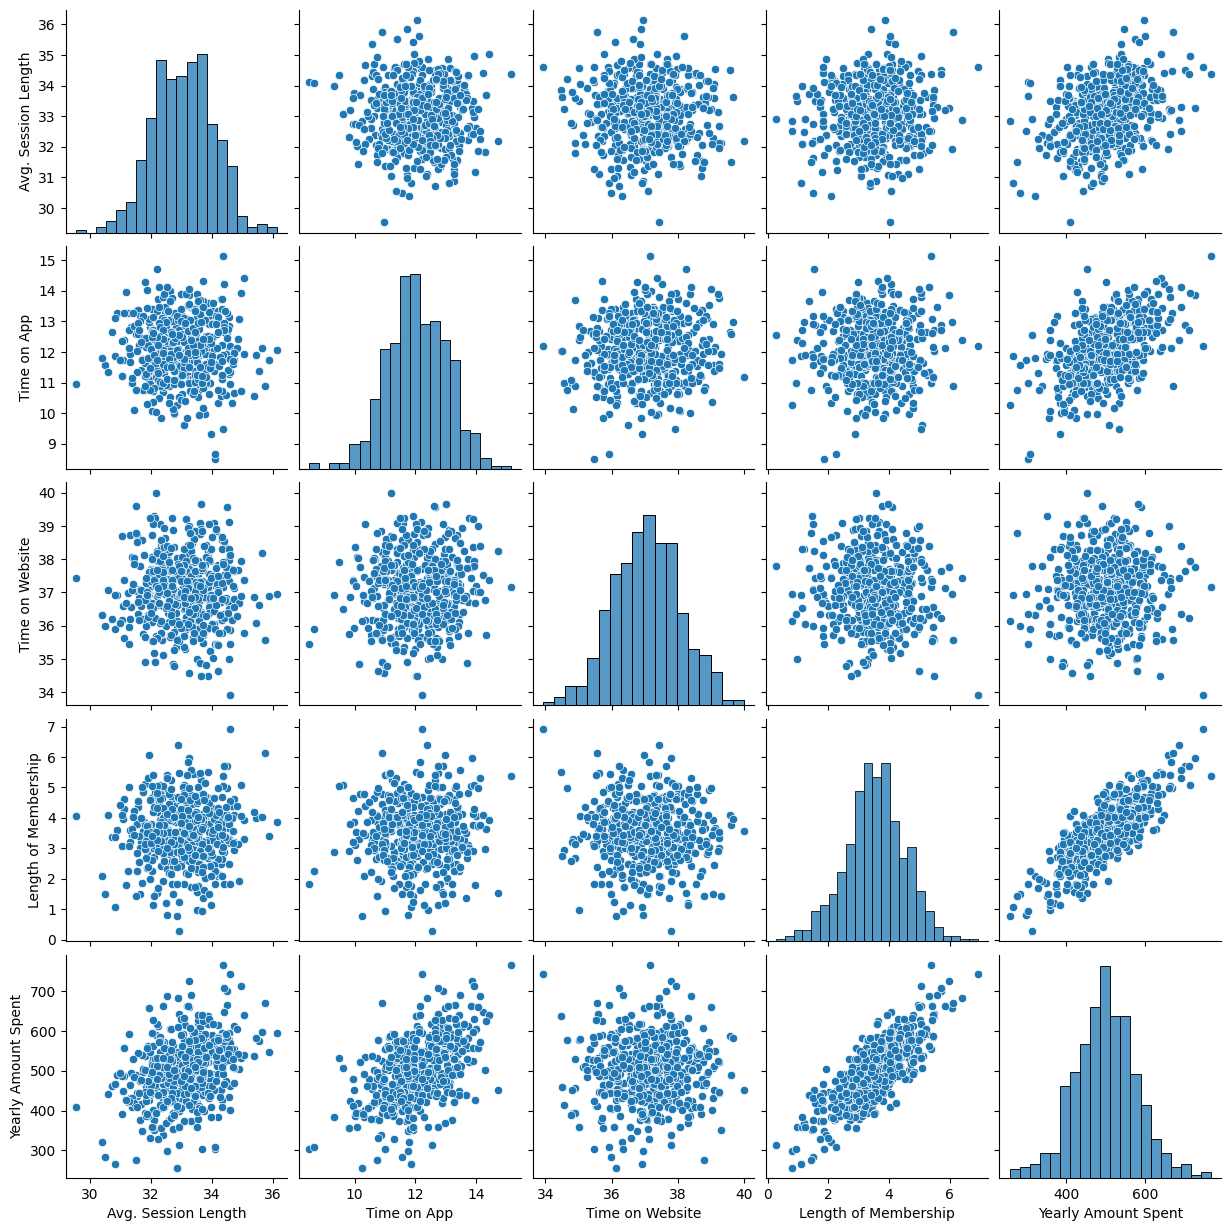

In [7]:
sns.pairplot(empresa)

<ipython-input-9-afb50b92a11f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(empresa["Yearly Amount Spent"])


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

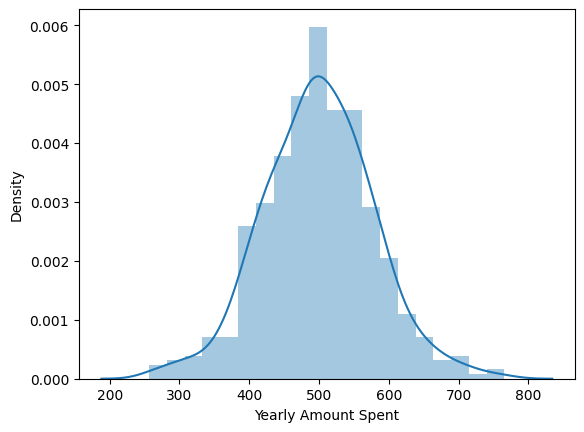

In [9]:
sns.distplot(empresa["Yearly Amount Spent"])

## Treinamento

In [10]:
X = empresa[['Time on App', 'Time on Website']]
Y = empresa['Yearly Amount Spent']

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=101)
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

## Influência das variáveis independentes

In [11]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=["Coefficient"])
print(coeff_df)

                 Coefficient
Time on App        39.056428
Time on Website    -2.243310


## Predição

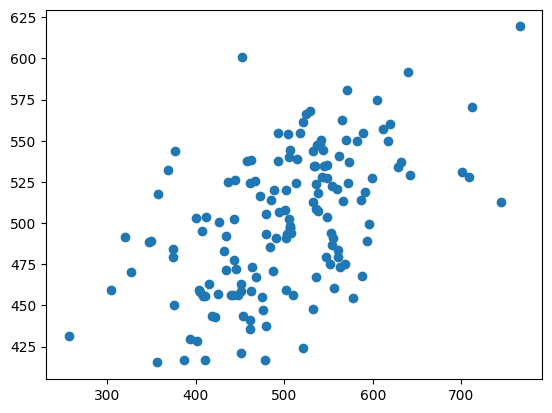

In [12]:
pred = lm.predict(x_test)
plt.scatter(y_test,pred)

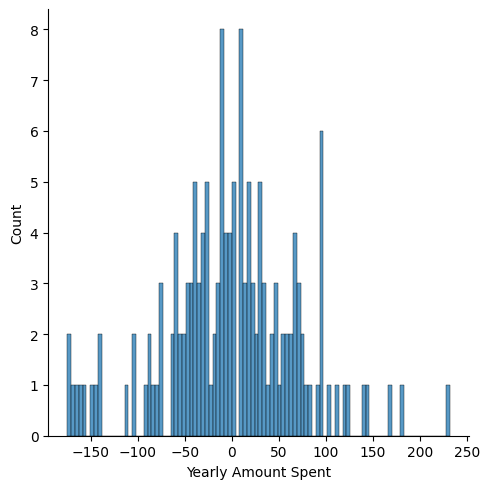

In [13]:
sns.displot((y_test-pred),bins=100)

In [14]:
# Erro Absoluto Médio (MAE)
mae = metrics.mean_absolute_error(y_test, pred)
print('MAE: ', mae)

# Erro Quadrático Médio (MSE)
mse = metrics.mean_squared_error(y_test, pred)
print('MSE: ', mse)

# Raiz do Erro Quadrático Médio (RMSE)
rmse = np.sqrt(mse)
print('RMSE:', rmse)


MAE:  54.60750251531469
MSE:  5201.2209076553345
RMSE: 72.11949048388608


<ipython-input-15-441125daaf95>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = empresa.corr()


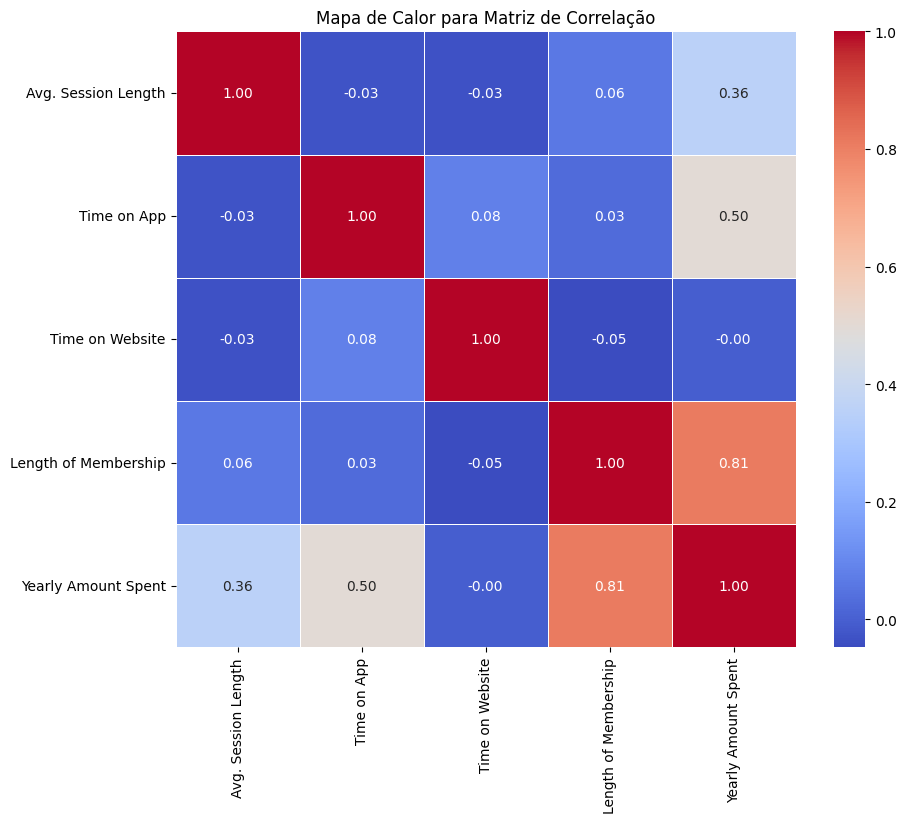

In [15]:
correlation_matrix = empresa.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor para Matriz de Correlação')
plt.show()


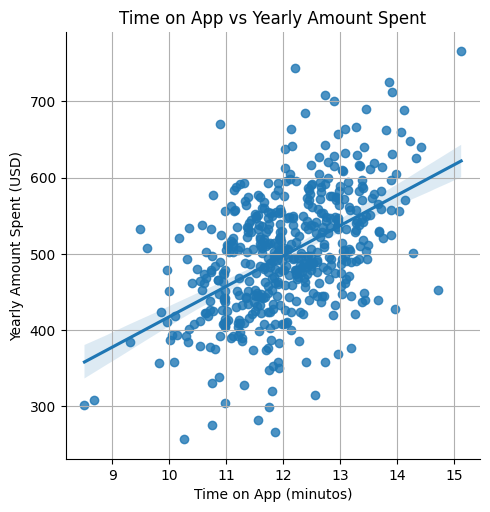

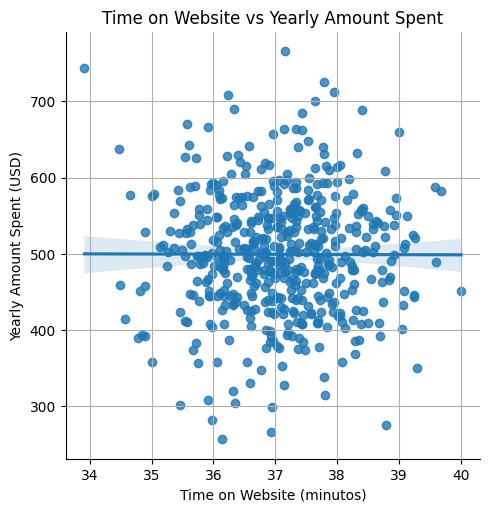

In [16]:
# tempo app
sns.lmplot(x='Time on App', y='Yearly Amount Spent', data=empresa)
plt.title('Time on App vs Yearly Amount Spent')
plt.xlabel('Time on App (minutos)')
plt.ylabel('Yearly Amount Spent (USD)')
plt.grid(True)
plt.show()

# tempo site
sns.lmplot(x='Time on Website', y='Yearly Amount Spent', data=empresa)
plt.title('Time on Website vs Yearly Amount Spent')
plt.xlabel('Time on Website (minutos)')
plt.ylabel('Yearly Amount Spent (USD)')
plt.grid(True)
plt.show()

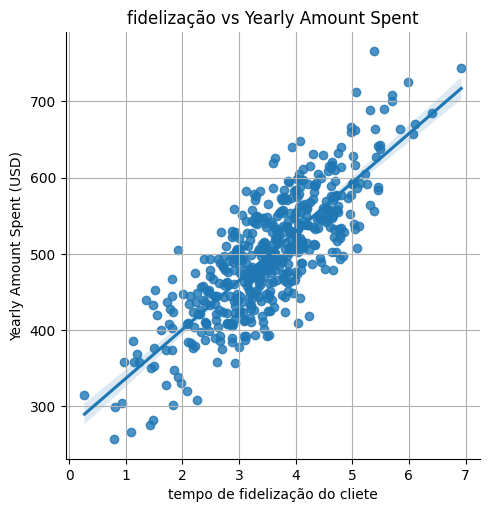

In [17]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=empresa)
plt.title('fidelização vs Yearly Amount Spent')
plt.xlabel('tempo de fidelização do cliete')
plt.ylabel('Yearly Amount Spent (USD)')
plt.grid(True)
plt.show()